In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import rc

font = {'family' : 'sans-serif',
        'weight' : 'light',
        'size'   : '12'}

plt.rc('font', **font)

In [2]:
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

In [3]:
def do_calc_brain(input_tab):
    """Do the calculation."""
    # read in a tabe into a dataframe
    inp_df = pd.read_table(input_tab)
    # transpose it for easy manipulation
    df = inp_df.T
    # name the columns accordingly
    df.columns = df.iloc[0].values
    # separate 5fc/no5fc
    yes5fc = df.iloc[2:, 1::2]
    no5fc = df.iloc[2:, 2::2]
    # compute average, only interested in WT
    av_no5fc_wt = (1. / 3.) * no5fc[["WT_A1", "WT_C1", "WT_F1"]].sum(axis=1)
    av_5fc_wt = (1. / 3.) * yes5fc[["WT_A1", "WT_C1", "WT_F1"]].sum(axis=1)

    curves = {"5fC":av_5fc_wt, "no5fC":av_no5fc_wt}
    min1kb = df.index.get_loc("-1.0Kb") - 1
    plus1kb = df.index.get_loc("1.0Kb") - 1
    center = df.index.get_loc("TSS") - 1
    return [curves, [min1kb, center, plus1kb]]

In [4]:
def plot_data_brain(results, outpdf="cpgi_h3k27ac_h3k4me1_5fc_no5fc_mnase.pdf"):
    """Do the plotting."""
    num_plots = 3
    y_ax_log = "MNase (RPKM)"
    labels = ["-1.0Kb", "Center", "1.0Kb"]
    f, ax = plt.subplots(1, 3, sharex=True,
                         figsize=(9,3), dpi=120)
    f.subplots_adjust(hspace=0.1)
    f.subplots_adjust(wspace=0.3)

    count_j = 0
    variant=["CpGi", "H3K27Ac", "H3K4me1" ]
    for r in results[0:3]:
        count_j += 1

        for key, state in r[0].iteritems():
            x = np.arange(0, len(state))
            ax[count_j-1].set_axisbelow(True)
            ax[count_j-1].set_xticks(r[1])
            ax[count_j-1].set_xticklabels(labels)
            
            if count_j == 1:
                ax[count_j-1].set_ylabel(y_ax_log)
            ax[count_j-1].plot(x, state, marker="",
                    label=key, linestyle="-") 
        if count_j ==1:
            legend = ax[count_j-1].legend(loc='upper right', frameon=False)
        if count_j >= 3:
            count_j = 0
        
    #ax.set_ylabel(y_ax_label)
    #ax.set_title("5fC vs no5fC")
    #plt.show()
    plt.tight_layout()
    plt.savefig(outpdf)

In [5]:
list_brain = ["CpGi_WT_brain_referencepoint.dat", 
              "H3K27ac_WT_brain_referencepoint.dat", 
              "H3K4me1_WT_brain_referencepoint.dat"]             

In [6]:
results = []
for f in list_brain:
    r = do_calc_brain(f)
    results.append(r)

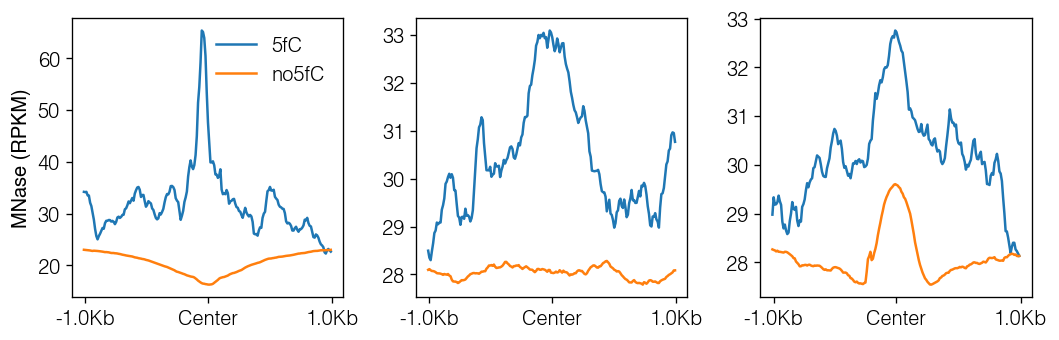

In [7]:
plot_data_brain(results)

In the paper we have rearranged the figures within the pannel in a different 
way, but it is exactly the same data. 